In [135]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import statsmodels
import statsmodels.formula.api as smf


from sklearn import svm  # for outliers detection

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
data = pd.read_csv('salaries.csv')

In [3]:
data.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Университет,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,cls
0,1,Senior Software Engineer,C#/.NET,NaN,7,6,3400,400,Днепр,до 50 человек,...,ДНУ им. Гончара,False,средний,Другое,03/06/2019 13:02:12,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,7.0,6.0,3400,DEV
1,2,QA engineer,NaN,Automation QA,1.5,1,2800,1300,Киев,до 50 человек,...,НТУУ «КПИ»,False,выше среднего,Веб-разработка,03/06/2019 13:02:53,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,1.0,2800,QA
2,3,Senior Software Engineer,Ruby/Rails,NaN,10 и более лет,10 и более лет,2000,100,Львов,до 50 человек,...,ДонНУ им. Васыля Стуса,False,выше среднего,"Веб-разработка,Другое",03/06/2019 13:02:58,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,10.0,10.0,2000,DEV
3,4,Senior Software Engineer,Ruby/Rails,NaN,10 и более лет,3,8000,3000,Одесса,до 50 человек,...,ДонНТУ,False,средний,Веб-разработка,03/06/2019 13:03:19,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,10.0,3.0,8000,DEV
4,5,Software Engineer,PHP,NaN,5,4,3200,1200,Днепр,до 10 человек,...,НметАУ,False,средний,eCommerce,03/06/2019 13:03:20,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,5.0,4.0,3200,DEV


In [4]:
data.shape

(11439, 24)

In [5]:
data.columns

Index(['N', 'Должность', 'Язык.программирования', 'Специализация',
       'Общий.опыт.работы', 'Опыт.работы.на.текущем.месте', 'Зарплата.в.месяц',
       'Изменение.зарплаты.за.12.месяцев', 'Город', 'Размер.компании',
       'Тип.компании', 'Пол', 'Возраст', 'Образование', 'Университет',
       'Еще.студент', 'Уровень.английского', 'Предметная.область',
       'Дата.заполнения', 'User.Agent', 'exp', 'current_job_exp', 'salary',
       'cls'],
      dtype='object')

In [6]:
data['Должность'].value_counts()

Software Engineer                             2739
Junior Software Engineer                      1476
Senior Software Engineer                      1337
QA engineer                                    933
Junior QA engineer                             513
Project manager                                510
HR                                             400
Senior QA engineer                             333
Designer                                       313
Technical Lead                                 311
DevOps                                         281
Business analyst                               251
Sysadmin                                       207
Marketing                                      192
Team lead                                      181
Support                                        177
Product Manager                                145
QA Tech Lead                                   129
Data Scientist                                 123
Sales manager                  

In [7]:
interested = ['Software Engineer', 'Junior Software Engineer', 'Senior Software Engineer', 'Technical Lead',\
              'Business analyst', 'Team lead', 'Data Scientist', 'Data Analyst', 'System Architect', 'QA engineer',\
             'Junior QA engineer', 'Senior QA engineer', 'QA Tech Lead']

In [8]:
data = data[data['Должность'].isin(interested)]

In [9]:
data.cls.value_counts()

DEV     5552
QA      1908
SDEV     398
PM       181
Name: cls, dtype: int64

In [10]:
data['Должность'].loc[data.cls == 'DEV'].value_counts()

Software Engineer           2739
Junior Software Engineer    1476
Senior Software Engineer    1337
Name: Должность, dtype: int64

In [11]:
data['Должность'].loc[data.cls == 'QA'].value_counts()

QA engineer           933
Junior QA engineer    513
Senior QA engineer    333
QA Tech Lead          129
Name: Должность, dtype: int64

In [12]:
data['Должность'].loc[data.cls == 'SDEV'].value_counts()

Technical Lead      311
System Architect     87
Name: Должность, dtype: int64

In [13]:
data['Должность'].loc[data.cls == 'PM'].value_counts()

Team lead    181
Name: Должность, dtype: int64

In [14]:
data.head(50)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Университет,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,cls
0,1,Senior Software Engineer,C#/.NET,NaN,7,6,3400,400,Днепр,до 50 человек,...,ДНУ им. Гончара,False,средний,Другое,03/06/2019 13:02:12,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,7.0,6.00,3400,DEV
1,2,QA engineer,NaN,Automation QA,1.5,1,2800,1300,Киев,до 50 человек,...,НТУУ «КПИ»,False,выше среднего,Веб-разработка,03/06/2019 13:02:53,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,1.00,2800,QA
2,3,Senior Software Engineer,Ruby/Rails,NaN,10 и более лет,10 и более лет,2000,100,Львов,до 50 человек,...,ДонНУ им. Васыля Стуса,False,выше среднего,"Веб-разработка,Другое",03/06/2019 13:02:58,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,10.0,10.00,2000,DEV
3,4,Senior Software Engineer,Ruby/Rails,NaN,10 и более лет,3,8000,3000,Одесса,до 50 человек,...,ДонНТУ,False,средний,Веб-разработка,03/06/2019 13:03:19,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,10.0,3.00,8000,DEV
4,5,Software Engineer,PHP,NaN,5,4,3200,1200,Днепр,до 10 человек,...,НметАУ,False,средний,eCommerce,03/06/2019 13:03:20,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,5.0,4.00,3200,DEV
5,6,Software Engineer,Java,NaN,6,0.5,3000,500,Киев,до 1000 человек,...,НАУ,False,выше среднего,"Веб-разработка,Другое",03/06/2019 13:03:24,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,6.0,0.50,3000,DEV
6,7,Senior Software Engineer,PHP,NaN,9,1.5,4000,0,Киев,до 50 человек,...,Другой вуз,False,ниже среднего,"Веб-разработка,Финансы и банки",03/06/2019 13:03:27,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,9.0,1.50,4000,DEV
7,8,Senior QA engineer,NaN,General QA,10 и более лет,7,2700,0,Киев,до 50 человек,...,КНУ им. Шевченко,False,ниже среднего,"Desktop Applications,Веб-разработка",03/06/2019 13:03:49,Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:67...,10.0,7.00,2700,QA
8,9,QA engineer,NaN,Manual QA,1.5,1.5,1000,200,Киев,до 200 человек,...,Другой вуз,False,продвинутый,Веб-разработка,03/06/2019 13:03:49,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,1.5,1.50,1000,QA
9,10,Senior Software Engineer,JavaScript,NaN,8,4,3700,100,Киев,до 50 человек,...,ЖГТУ,False,средний,"Веб-разработка,Финансы и банки",03/06/2019 13:04:25,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,8.0,4.00,3700,DEV


In [15]:
columns_to_delete = ['Специализация', 'Предметная.область','Общий.опыт.работы', 'Зарплата.в.месяц',\
                     'Дата.заполнения', 'User.Agent', 'Опыт.работы.на.текущем.месте'  ]

In [16]:
np.all(data['Зарплата.в.месяц'].values == data.salary.values)

True

In [17]:
data.drop(columns_to_delete, axis=1, inplace=True)

In [18]:
data.head(20)

,N,Должность,Язык.программирования,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Университет,Еще.студент,Уровень.английского,exp,current_job_exp,salary,cls
0,1,Senior Software Engineer,C#/.NET,400,Днепр,до 50 человек,Продуктовая,мужской,27,Высшее,ДНУ им. Гончара,False,средний,7.0,6.0,3400,DEV
1,2,QA engineer,NaN,1300,Киев,до 50 человек,Стартап,мужской,21,Высшее,НТУУ «КПИ»,False,выше среднего,1.5,1.0,2800,QA
2,3,Senior Software Engineer,Ruby/Rails,100,Львов,до 50 человек,Аутстаффинговая,мужской,34,Высшее,ДонНУ им. Васыля Стуса,False,выше среднего,10.0,10.0,2000,DEV
3,4,Senior Software Engineer,Ruby/Rails,3000,Одесса,до 50 человек,Аутсорсинговая,мужской,40,Незаконченное высшее,ДонНТУ,False,средний,10.0,3.0,8000,DEV
4,5,Software Engineer,PHP,1200,Днепр,до 10 человек,Аутсорсинговая,мужской,31,Высшее,НметАУ,False,средний,5.0,4.0,3200,DEV
5,6,Software Engineer,Java,500,Киев,до 1000 человек,Аутсорсинговая,мужской,27,Высшее,НАУ,False,выше среднего,6.0,0.5,3000,DEV
6,7,Senior Software Engineer,PHP,0,Киев,до 50 человек,Продуктовая,мужской,30,Высшее,Другой вуз,False,ниже среднего,9.0,1.5,4000,DEV
7,8,Senior QA engineer,NaN,0,Киев,до 50 человек,Продуктовая,мужской,35,Высшее,КНУ им. Шевченко,False,ниже среднего,10.0,7.0,2700,QA
8,9,QA engineer,NaN,200,Киев,до 200 человек,Аутсорсинговая,женский,24,Высшее,Другой вуз,False,продвинутый,1.5,1.5,1000,QA
9,10,Senior Software Engineer,JavaScript,100,Киев,до 50 человек,Продуктовая,мужской,29,Высшее,ЖГТУ,False,средний,8.0,4.0,3700,DEV


In [19]:
data.columns

Index(['N', 'Должность', 'Язык.программирования',
       'Изменение.зарплаты.за.12.месяцев', 'Город', 'Размер.компании',
       'Тип.компании', 'Пол', 'Возраст', 'Образование', 'Университет',
       'Еще.студент', 'Уровень.английского', 'exp', 'current_job_exp',
       'salary', 'cls'],
      dtype='object')

In [20]:
data.drop(['N'], axis=1, inplace=True)

In [21]:
columns_to_eng = {}

In [22]:
data.cls.loc[data['Должность'] == 'Data Scientist'] = data.cls.loc[data['Должность'] == 'Data Scientist'].fillna('DS')

C:\Users\Andrey.LAPTOP-26CASLG5\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
data.cls.loc[data['Должность'] == 'Data Analyst'] = data.cls.loc[data['Должность'] == 'Data Analyst'].fillna('DA')

In [24]:
data.cls.loc[data['Должность'] == 'Business analyst'] = data.cls.loc[data['Должность'] == 'Business analyst'].fillna('BA')

In [25]:
data.columns

Index(['Должность', 'Язык.программирования',
       'Изменение.зарплаты.за.12.месяцев', 'Город', 'Размер.компании',
       'Тип.компании', 'Пол', 'Возраст', 'Образование', 'Университет',
       'Еще.студент', 'Уровень.английского', 'exp', 'current_job_exp',
       'salary', 'cls'],
      dtype='object')

In [26]:
data['Тип.компании'].value_counts(normalize=True)

Аутсорсинговая     0.481981
Продуктовая        0.310717
Аутстаффинговая    0.120437
Стартап            0.044137
Другая             0.042728
Name: Тип.компании, dtype: float64

In [27]:
data['Тип.компании'].loc[data['Должность'] == 'Data Scientist'].value_counts(normalize=True)

Продуктовая        0.406504
Аутсорсинговая     0.260163
Стартап            0.170732
Другая             0.089431
Аутстаффинговая    0.073171
Name: Тип.компании, dtype: float64

In [28]:
data.head(20)

,Должность,Язык.программирования,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Университет,Еще.студент,Уровень.английского,exp,current_job_exp,salary,cls
0,Senior Software Engineer,C#/.NET,400,Днепр,до 50 человек,Продуктовая,мужской,27,Высшее,ДНУ им. Гончара,False,средний,7.0,6.0,3400,DEV
1,QA engineer,NaN,1300,Киев,до 50 человек,Стартап,мужской,21,Высшее,НТУУ «КПИ»,False,выше среднего,1.5,1.0,2800,QA
2,Senior Software Engineer,Ruby/Rails,100,Львов,до 50 человек,Аутстаффинговая,мужской,34,Высшее,ДонНУ им. Васыля Стуса,False,выше среднего,10.0,10.0,2000,DEV
3,Senior Software Engineer,Ruby/Rails,3000,Одесса,до 50 человек,Аутсорсинговая,мужской,40,Незаконченное высшее,ДонНТУ,False,средний,10.0,3.0,8000,DEV
4,Software Engineer,PHP,1200,Днепр,до 10 человек,Аутсорсинговая,мужской,31,Высшее,НметАУ,False,средний,5.0,4.0,3200,DEV
5,Software Engineer,Java,500,Киев,до 1000 человек,Аутсорсинговая,мужской,27,Высшее,НАУ,False,выше среднего,6.0,0.5,3000,DEV
6,Senior Software Engineer,PHP,0,Киев,до 50 человек,Продуктовая,мужской,30,Высшее,Другой вуз,False,ниже среднего,9.0,1.5,4000,DEV
7,Senior QA engineer,NaN,0,Киев,до 50 человек,Продуктовая,мужской,35,Высшее,КНУ им. Шевченко,False,ниже среднего,10.0,7.0,2700,QA
8,QA engineer,NaN,200,Киев,до 200 человек,Аутсорсинговая,женский,24,Высшее,Другой вуз,False,продвинутый,1.5,1.5,1000,QA
9,Senior Software Engineer,JavaScript,100,Киев,до 50 человек,Продуктовая,мужской,29,Высшее,ЖГТУ,False,средний,8.0,4.0,3700,DEV


In [29]:
data.cls.value_counts()

DEV     5552
QA      1908
SDEV     398
BA       251
PM       181
DS       123
DA       106
Name: cls, dtype: int64

In [30]:
data.columns

Index(['Должность', 'Язык.программирования',
       'Изменение.зарплаты.за.12.месяцев', 'Город', 'Размер.компании',
       'Тип.компании', 'Пол', 'Возраст', 'Образование', 'Университет',
       'Еще.студент', 'Уровень.английского', 'exp', 'current_job_exp',
       'salary', 'cls'],
      dtype='object')

In [31]:
df_new_columns = ['title', 'prog_lang', 'salary_delta', 'city', 'company_size', 'company_type', 'sex', 'age',\
                 'education', 'university', 'still_student', 'eng_level', 'exp', 'current_job_exp',\
                  'salary', 'cls']

In [32]:
data.columns = df_new_columns

In [33]:
data.head()

,title,prog_lang,salary_delta,city,company_size,company_type,sex,age,education,university,still_student,eng_level,exp,current_job_exp,salary,cls
0,Senior Software Engineer,C#/.NET,400,Днепр,до 50 человек,Продуктовая,мужской,27,Высшее,ДНУ им. Гончара,False,средний,7.0,6.0,3400,DEV
1,QA engineer,NaN,1300,Киев,до 50 человек,Стартап,мужской,21,Высшее,НТУУ «КПИ»,False,выше среднего,1.5,1.0,2800,QA
2,Senior Software Engineer,Ruby/Rails,100,Львов,до 50 человек,Аутстаффинговая,мужской,34,Высшее,ДонНУ им. Васыля Стуса,False,выше среднего,10.0,10.0,2000,DEV
3,Senior Software Engineer,Ruby/Rails,3000,Одесса,до 50 человек,Аутсорсинговая,мужской,40,Незаконченное высшее,ДонНТУ,False,средний,10.0,3.0,8000,DEV
4,Software Engineer,PHP,1200,Днепр,до 10 человек,Аутсорсинговая,мужской,31,Высшее,НметАУ,False,средний,5.0,4.0,3200,DEV


In [34]:
pd.crosstab(data.prog_lang, data.cls)

cls,DA,DEV,PM,QA,SDEV
prog_lang,,,,,
1С,0,47,0,0,4
ABAP,0,7,0,0,0
APL,0,2,0,0,0
C,0,41,0,0,2
C#/.NET,0,830,0,0,78
C++,0,228,0,1,18
Clojure,0,9,0,0,0
Delphi,0,19,0,0,1
Erlang,0,15,0,0,1


In [35]:
data.city.value_counts(dropna=False)

Киев               3556
Харьков            1299
Львов              1153
Днепр               612
Одесса              439
Винница             283
Удаленно            251
Запорожье           122
Другой              110
Ивано-Франковск      94
Черновцы             92
Черкассы             66
Николаев             56
Хмельницкий          49
Житомир              39
Тернополь            38
Сумы                 38
Чернигов             35
Ужгород              30
Херсон               28
Луцк                 28
Ровно                27
Полтава              27
Кривой Рог           23
Кропивницкий         18
Мариуполь             6
Name: city, dtype: int64

In [36]:
top_5_cities = ['Киев', 'Харьков', 'Львов', 'Днепр', 'Одесса']

In [37]:
data.loc[data.city.isin(top_5_cities)].shape[0] / data.shape[0]

0.8286183824392535

top 5 cities represents 82.3% of all sample

In [38]:
print('proportion in top 5 cities')

for CLS in np.unique(data.cls.values):
    proportion = data.loc[data.cls == CLS].loc[data.city.isin(top_5_cities)].shape[0] / data.loc[data.cls == CLS].shape[0]
    print('cls: ' + CLS + '    proportion: ' + str(proportion))

proportion in top 5 cities
cls: BA    proportion: 0.9123505976095617
cls: DA    proportion: 0.9245283018867925
cls: DEV    proportion: 0.8052953890489913
cls: DS    proportion: 0.9024390243902439
cls: PM    proportion: 0.9005524861878453
cls: QA    proportion: 0.8616352201257862
cls: SDEV    proportion: 0.8618090452261307


In [39]:
np.unique(data.cls.values)

array(['BA', 'DA', 'DEV', 'DS', 'PM', 'QA', 'SDEV'], dtype=object)

In [40]:
data.cls.value_counts(dropna=False)

DEV     5552
QA      1908
SDEV     398
BA       251
PM       181
DS       123
DA       106
Name: cls, dtype: int64

In [41]:
np.unique(data.title)

array(['Business analyst', 'Data Analyst', 'Data Scientist',
       'Junior QA engineer', 'Junior Software Engineer', 'QA Tech Lead',
       'QA engineer', 'Senior QA engineer', 'Senior Software Engineer',
       'Software Engineer', 'System Architect', 'Team lead',
       'Technical Lead'], dtype=object)

In [42]:
data.loc[data.title == 'Business analyst'].shape[0]

251

In [43]:
data = data.loc[data.city.isin(top_5_cities)]

In [44]:
data.shape

(7059, 16)

In [45]:
data.head()

,title,prog_lang,salary_delta,city,company_size,company_type,sex,age,education,university,still_student,eng_level,exp,current_job_exp,salary,cls
0,Senior Software Engineer,C#/.NET,400,Днепр,до 50 человек,Продуктовая,мужской,27,Высшее,ДНУ им. Гончара,False,средний,7.0,6.0,3400,DEV
1,QA engineer,NaN,1300,Киев,до 50 человек,Стартап,мужской,21,Высшее,НТУУ «КПИ»,False,выше среднего,1.5,1.0,2800,QA
2,Senior Software Engineer,Ruby/Rails,100,Львов,до 50 человек,Аутстаффинговая,мужской,34,Высшее,ДонНУ им. Васыля Стуса,False,выше среднего,10.0,10.0,2000,DEV
3,Senior Software Engineer,Ruby/Rails,3000,Одесса,до 50 человек,Аутсорсинговая,мужской,40,Незаконченное высшее,ДонНТУ,False,средний,10.0,3.0,8000,DEV
4,Software Engineer,PHP,1200,Днепр,до 10 человек,Аутсорсинговая,мужской,31,Высшее,НметАУ,False,средний,5.0,4.0,3200,DEV


In [46]:
data.company_size.value_counts()

до 50 человек         1754
до 200 человек        1673
свыше 1000 человек    1560
до 1000 человек       1249
до 10 человек          823
Name: company_size, dtype: int64

In [47]:
pd.crosstab(data.company_size, data.cls, normalize='columns', margins=True).sort_values('All')

cls,BA,DA,DEV,DS,PM,QA,SDEV,All
company_size,,,,,,,,
до 10 человек,0.043668,0.153061,0.144039,0.198198,0.079755,0.052920,0.093294,0.116589
до 1000 человек,0.196507,0.204082,0.162156,0.234234,0.251534,0.201946,0.174927,0.176937
свыше 1000 человек,0.196507,0.142857,0.199061,0.144144,0.184049,0.279805,0.306122,0.220994
до 200 человек,0.296943,0.275510,0.228137,0.162162,0.306748,0.254866,0.206997,0.237002
до 50 человек,0.266376,0.224490,0.266607,0.261261,0.177914,0.210462,0.218659,0.248477


In [48]:
data.head()

,title,prog_lang,salary_delta,city,company_size,company_type,sex,age,education,university,still_student,eng_level,exp,current_job_exp,salary,cls
0,Senior Software Engineer,C#/.NET,400,Днепр,до 50 человек,Продуктовая,мужской,27,Высшее,ДНУ им. Гончара,False,средний,7.0,6.0,3400,DEV
1,QA engineer,NaN,1300,Киев,до 50 человек,Стартап,мужской,21,Высшее,НТУУ «КПИ»,False,выше среднего,1.5,1.0,2800,QA
2,Senior Software Engineer,Ruby/Rails,100,Львов,до 50 человек,Аутстаффинговая,мужской,34,Высшее,ДонНУ им. Васыля Стуса,False,выше среднего,10.0,10.0,2000,DEV
3,Senior Software Engineer,Ruby/Rails,3000,Одесса,до 50 человек,Аутсорсинговая,мужской,40,Незаконченное высшее,ДонНТУ,False,средний,10.0,3.0,8000,DEV
4,Software Engineer,PHP,1200,Днепр,до 10 человек,Аутсорсинговая,мужской,31,Высшее,НметАУ,False,средний,5.0,4.0,3200,DEV


In [49]:
np.unique(data.company_size)

array(['до 10 человек', 'до 1000 человек', 'до 200 человек',
       'до 50 человек', 'свыше 1000 человек'], dtype=object)

In [50]:
company_size_ordered = {'до 10 человек': 0, 'до 50 человек': 1, 'до 200 человек': 2,\
                        'до 1000 человек': 3, 'свыше 1000 человек': 4 }

In [51]:
data['company_size_ordered'] = data.company_size.map(company_size_ordered)

In [52]:
data.head(10)

,title,prog_lang,salary_delta,city,company_size,company_type,sex,age,education,university,still_student,eng_level,exp,current_job_exp,salary,cls,company_size_ordered
0,Senior Software Engineer,C#/.NET,400,Днепр,до 50 человек,Продуктовая,мужской,27,Высшее,ДНУ им. Гончара,False,средний,7.0,6.0,3400,DEV,1
1,QA engineer,NaN,1300,Киев,до 50 человек,Стартап,мужской,21,Высшее,НТУУ «КПИ»,False,выше среднего,1.5,1.0,2800,QA,1
2,Senior Software Engineer,Ruby/Rails,100,Львов,до 50 человек,Аутстаффинговая,мужской,34,Высшее,ДонНУ им. Васыля Стуса,False,выше среднего,10.0,10.0,2000,DEV,1
3,Senior Software Engineer,Ruby/Rails,3000,Одесса,до 50 человек,Аутсорсинговая,мужской,40,Незаконченное высшее,ДонНТУ,False,средний,10.0,3.0,8000,DEV,1
4,Software Engineer,PHP,1200,Днепр,до 10 человек,Аутсорсинговая,мужской,31,Высшее,НметАУ,False,средний,5.0,4.0,3200,DEV,0
5,Software Engineer,Java,500,Киев,до 1000 человек,Аутсорсинговая,мужской,27,Высшее,НАУ,False,выше среднего,6.0,0.5,3000,DEV,3
6,Senior Software Engineer,PHP,0,Киев,до 50 человек,Продуктовая,мужской,30,Высшее,Другой вуз,False,ниже среднего,9.0,1.5,4000,DEV,1
7,Senior QA engineer,NaN,0,Киев,до 50 человек,Продуктовая,мужской,35,Высшее,КНУ им. Шевченко,False,ниже среднего,10.0,7.0,2700,QA,1
8,QA engineer,NaN,200,Киев,до 200 человек,Аутсорсинговая,женский,24,Высшее,Другой вуз,False,продвинутый,1.5,1.5,1000,QA,2
9,Senior Software Engineer,JavaScript,100,Киев,до 50 человек,Продуктовая,мужской,29,Высшее,ЖГТУ,False,средний,8.0,4.0,3700,DEV,1


In [53]:
np.unique(data.education)

array(['Высшее', 'Два высших', 'Кандидат', 'Незаконченное высшее',
       'Среднее', 'Техникум / Колледж'], dtype=object)

In [54]:
data.education.value_counts()

Высшее                  5362
Незаконченное высшее     998
Два высших               340
Техникум / Колледж       147
Среднее                  111
Кандидат                 101
Name: education, dtype: int64

In [55]:
education_map = {'Среднее': 0, 'Техникум / Колледж': 0, 'Высшее': 1, 'Незаконченное высшее': 1,\
                'Два высших': 2, 'Кандидат': 2}

In [56]:
data['edu_level'] = data.education.map(education_map)

In [57]:
np.unique(data.eng_level)

array(['выше среднего', 'ниже среднего', 'продвинутый', 'средний',
       'элементарный'], dtype=object)

In [58]:
eng_level_ord = {'элементарный': 0, 'ниже среднего': 1, 'средний': 2, 'выше среднего': 3, 'продвинутый': 4}

In [59]:
data['eng_level_ord'] = data.eng_level.map(eng_level_ord)

In [60]:
data.head()


,title,prog_lang,salary_delta,city,company_size,company_type,sex,age,education,university,still_student,eng_level,exp,current_job_exp,salary,cls,company_size_ordered,edu_level,eng_level_ord
0,Senior Software Engineer,C#/.NET,400,Днепр,до 50 человек,Продуктовая,мужской,27,Высшее,ДНУ им. Гончара,False,средний,7.0,6.0,3400,DEV,1,1,2
1,QA engineer,NaN,1300,Киев,до 50 человек,Стартап,мужской,21,Высшее,НТУУ «КПИ»,False,выше среднего,1.5,1.0,2800,QA,1,1,3
2,Senior Software Engineer,Ruby/Rails,100,Львов,до 50 человек,Аутстаффинговая,мужской,34,Высшее,ДонНУ им. Васыля Стуса,False,выше среднего,10.0,10.0,2000,DEV,1,1,3
3,Senior Software Engineer,Ruby/Rails,3000,Одесса,до 50 человек,Аутсорсинговая,мужской,40,Незаконченное высшее,ДонНТУ,False,средний,10.0,3.0,8000,DEV,1,1,2
4,Software Engineer,PHP,1200,Днепр,до 10 человек,Аутсорсинговая,мужской,31,Высшее,НметАУ,False,средний,5.0,4.0,3200,DEV,0,1,2


## now lets do some data analysis

### we will work mostly with software ingeneers since they replresent most of out sample

In [159]:
data = data.loc[data.age <= 45 ]

In [160]:
swe = data[data.cls == 'DEV']

In [161]:
ds = data[data.cls == 'DS']
da = data[data.cls == 'DA']
top_swe = data[data.cls == 'SDEV']

In [79]:
interested_list = [swe, top_swe, ds, da]
interested_list_str = ['DEV', 'SDEV', 'DA', 'DS']

In [64]:
df = data[data.cls.isin(['DEV', 'SDEV', 'DA', 'DS'])]

In [65]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

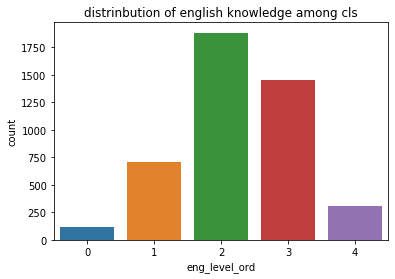

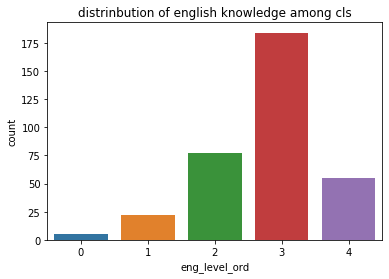

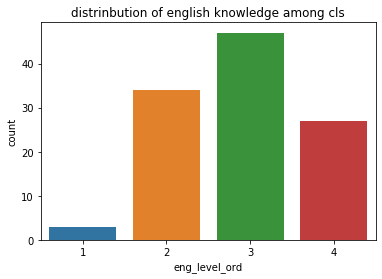

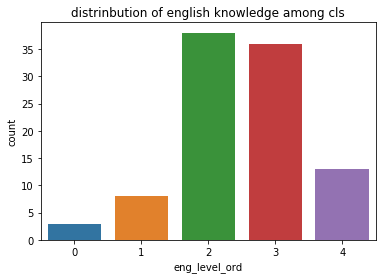

In [162]:
for cls in interested_list:
    plt.title('distrinbution of english knowledge among ' + get_df_name(cls))
    sns.countplot(data=cls, x = 'eng_level_ord');
    plt.show()

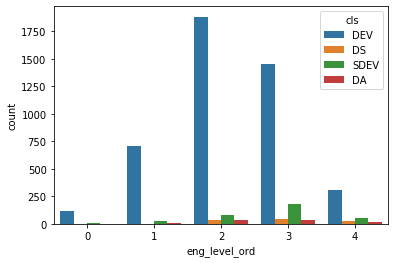

In [69]:
sns.countplot(data=df, x="eng_level_ord", hue = 'cls');

In [87]:
def print_normalized_countplot(df, x, hue, y='proportion', figsize=(12,8), title = 'title'):
    
    plt.figure(figsize=figsize)
    df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()\
    .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)

### lest analyze eng level impact on salary

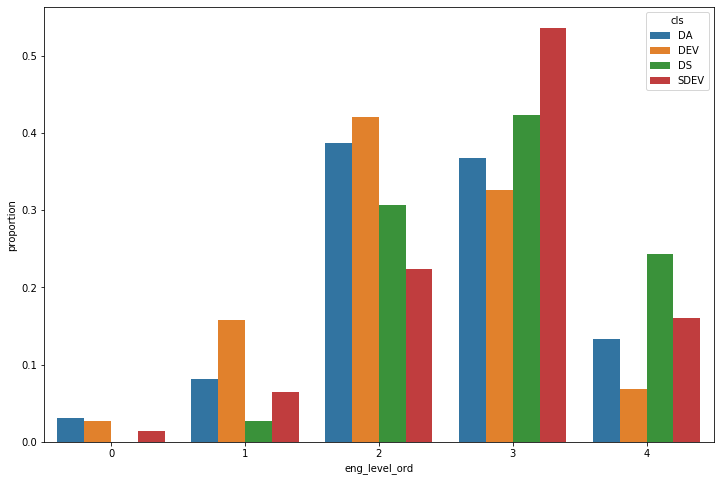

In [163]:
print_normalized_countplot(df, 'eng_level_ord', 'cls')

In [82]:
for item in interested_list_str:
    print(str(df.eng_level_ord.loc[df.cls == item].mean()) +'  -  '+ item)

2.2516215611719974  -  DEV
2.7638483965014577  -  SDEV
2.489795918367347  -  DA
2.8828828828828827  -  DS


In [93]:
sts.spearmanr(swe.eng_level_ord, swe.salary)

SpearmanrResult(correlation=0.311425518749972, pvalue=3.8197701709271624e-101)

In [94]:
sts.spearmanr(swe.edu_level, swe.salary)

SpearmanrResult(correlation=0.07655746067748512, pvalue=2.9730565024522324e-07)

In [92]:
swe.columns

Index(['title', 'prog_lang', 'salary_delta', 'city', 'company_size',
       'company_type', 'sex', 'age', 'education', 'university',
       'still_student', 'eng_level', 'exp', 'current_job_exp', 'salary', 'cls',
       'company_size_ordered', 'edu_level', 'eng_level_ord'],
      dtype='object')

In [95]:
sts.spearmanr(swe.company_size_ordered, swe.salary)

SpearmanrResult(correlation=0.19638824540274719, pvalue=4.097431114870745e-40)

In [98]:
swe.corr()

,salary_delta,age,still_student,exp,current_job_exp,salary,company_size_ordered,edu_level,eng_level_ord
salary_delta,1.000000,-0.056013,-0.031294,0.002543,-0.066940,0.205756,0.075034,0.010548,0.074773
age,-0.056013,1.000000,-0.494500,0.609509,0.312874,0.388877,-0.002576,0.148600,-0.019471
still_student,-0.031294,-0.494500,1.000000,-0.374046,-0.192147,-0.357930,-0.007615,-0.050470,-0.039342
exp,0.002543,0.609509,-0.374046,1.000000,0.478043,0.720114,0.067654,0.042878,0.128613
current_job_exp,-0.066940,0.312874,-0.192147,0.478043,1.000000,0.249237,0.008470,0.032994,0.011156
salary,0.205756,0.388877,-0.357930,0.720114,0.249237,1.000000,0.160785,0.077463,0.308197
company_size_ordered,0.075034,-0.002576,-0.007615,0.067654,0.008470,0.160785,1.000000,0.045158,0.178121
edu_level,0.010548,0.148600,-0.050470,0.042878,0.032994,0.077463,0.045158,1.000000,0.076109
eng_level_ord,0.074773,-0.019471,-0.039342,0.128613,0.011156,0.308197,0.178121,0.076109,1.000000


In [100]:
swe.columns

Index(['title', 'prog_lang', 'salary_delta', 'city', 'company_size',
       'company_type', 'sex', 'age', 'education', 'university',
       'still_student', 'eng_level', 'exp', 'current_job_exp', 'salary', 'cls',
       'company_size_ordered', 'edu_level', 'eng_level_ord'],
      dtype='object')

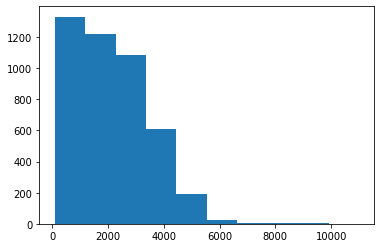

In [117]:
plt.hist(swe.salary);

In [164]:
reg_model_swe_1 = smf.ols('salary ~ company_size_ordered + sex + age + still_student +'\
                    'eng_level_ord + exp + edu_level ', 
             data=swe)

In [165]:
model_swe_1_features = ['company_size_ordered', 'sex', 'age', 'still_student', 'eng_level_ord', 'exp', 'edu_level']

In [166]:
fitted = reg_model_swe_1.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     937.5
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:51:12   Log-Likelihood:                -36124.
No. Observations:                4438   AIC:                         7.226e+04
Df Residuals:                    4430   BIC:                         7.231e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               304.62

C:\Users\Andrey.LAPTOP-26CASLG5\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


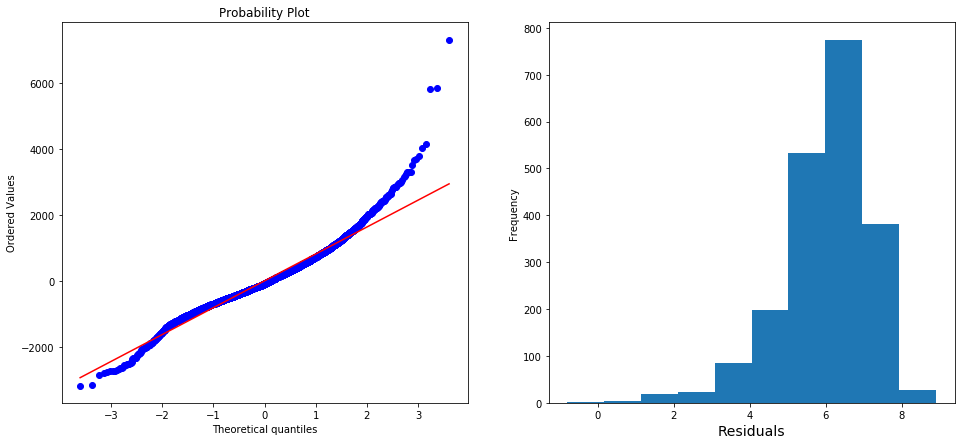

In [126]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sts.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show();

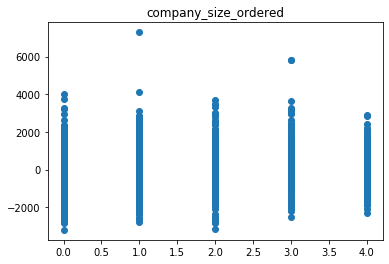

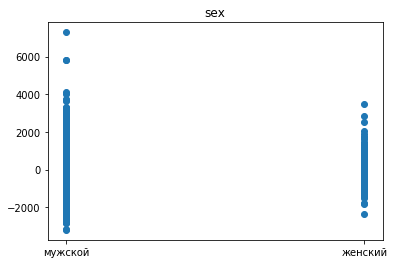

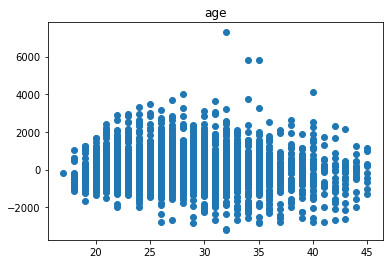

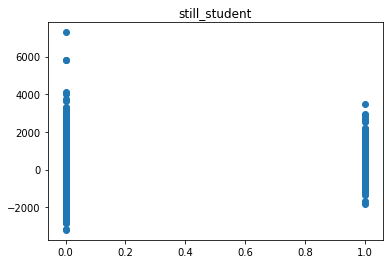

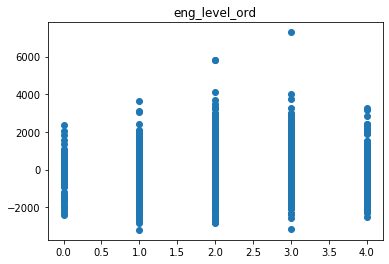

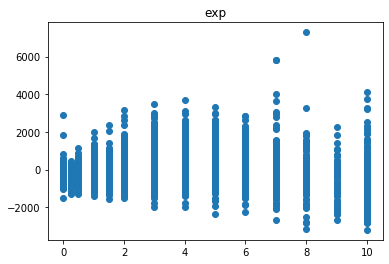

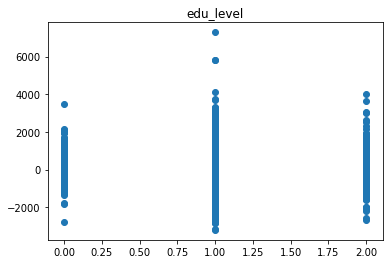

In [167]:
for item in model_swe_1_features:
    plt.title(item)
    plt.scatter(swe[item], fitted.resid);
    plt.show();

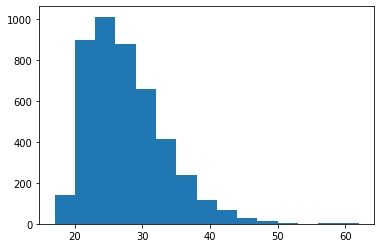

In [149]:
plt.hist(swe.age, bins = 15);

In [237]:
reg_model_2 = smf.ols('salary ~ company_size_ordered + sex + age + still_student +'\
                    'eng_level_ord + exp + edu_level + cls ',  
             data=data)

In [239]:
fitted = reg_model_2.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     817.9
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:11:53   Log-Likelihood:                -57189.
No. Observations:                7017   AIC:                         1.144e+05
Df Residuals:                    7003   BIC:                         1.145e+05
Df Model:                          13                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -85.54

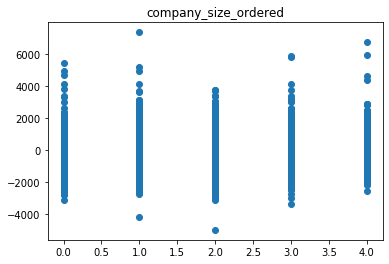

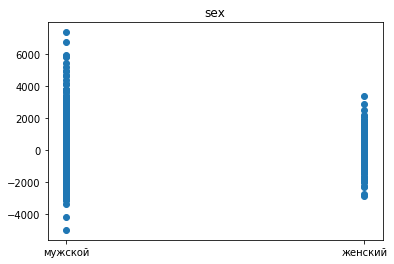

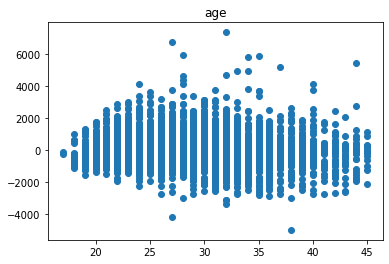

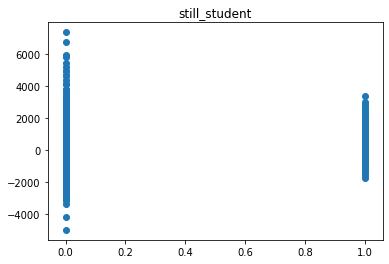

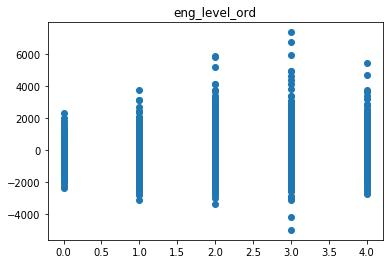

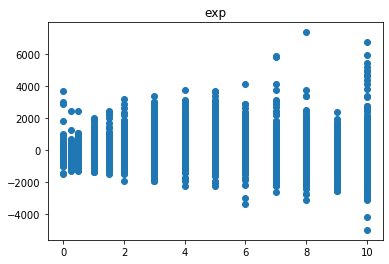

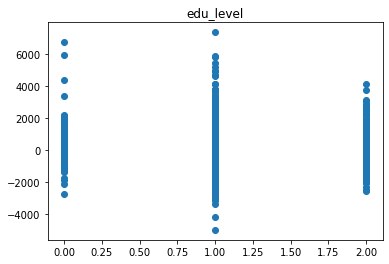

In [241]:
for item in model_swe_1_features:
    plt.title(item)
    plt.scatter(data[item], fitted.resid);
    plt.show();

In [179]:
ds.shape

(111, 19)

In [181]:
kiev_ds = ds.loc[ds.city == "Киев"]

In [186]:
kiev_ds.columns

Index(['title', 'prog_lang', 'salary_delta', 'city', 'company_size',
       'company_type', 'sex', 'age', 'education', 'university',
       'still_student', 'eng_level', 'exp', 'current_job_exp', 'salary', 'cls',
       'company_size_ordered', 'edu_level', 'eng_level_ord'],
      dtype='object')

In [206]:
to_show = ['sex', 'age', 'exp', 'salary', 'still_student',\
           'company_size', 'eng_level',   'education', 'university' ]

In [207]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 20):  # more options can be specified also
    display(kiev_ds[to_show].sort_values('exp'))

,sex,age,exp,salary,still_student,company_size,eng_level,education,university
7861,мужской,27,0.00,500,False,до 50 человек,средний,Кандидат,КНУСА
4035,мужской,24,0.00,500,False,до 200 человек,продвинутый,Высшее,Другой вуз
3275,мужской,20,0.25,520,True,до 50 человек,выше среднего,Незаконченное высшее,НТУУ «КПИ»
4305,мужской,24,0.50,720,True,до 50 человек,продвинутый,Высшее,НТУУ «КПИ»
10270,мужской,20,0.50,700,False,до 50 человек,средний,Высшее,НТУУ «КПИ»
5883,женский,22,0.50,500,True,до 10 человек,средний,Незаконченное высшее,НТУУ «КПИ»
9488,мужской,26,0.50,1200,False,до 50 человек,ниже среднего,Высшее,КНУ им. Шевченко
1554,мужской,19,0.50,700,True,до 50 человек,средний,Высшее,НТУУ «КПИ»
3459,женский,21,0.50,550,False,до 1000 человек,выше среднего,Высшее,ЖГТУ
8902,мужской,22,1.00,1000,False,до 1000 человек,средний,Высшее,НТУУ «КПИ»


In [211]:
exp_grad = np.arange(0, 7, 1)

In [213]:
cats = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6']
bins = [0, 1, 2, 3, 4, 5, 6]

In [216]:
temp = df[['cls', 'salary']].join(pd.get_dummies(pd.cut(df.exp, bins, labels=cats)))

In [222]:
np.unique(data.exp.values.astype(int))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [233]:
salary_df = data[['cls', 'salary', 'exp']].loc[data.exp <= 6].loc[data.city == 'Киев']

In [234]:
salary_df.exp = salary_df.exp.values.astype(int)

In [235]:
salary_df.loc[salary_df.cls.isin(['DA', 'QA', 'DEV', 'DS'])].groupby(['exp', 'cls'])['salary'].describe()


count         mean          std     min      25%     50%     75%  \
exp cls                                                                     
0   DA    15.0   836.000000   401.244493   380.0   600.00   740.0  1000.0   
    DEV  224.0   639.513393   341.814992   100.0   458.25   600.0   750.0   
    DS     9.0   654.444444   225.450167   500.0   500.00   550.0   700.0   
    QA    87.0   637.471264   486.056194   200.0   444.50   500.0   700.0   
1   DA    17.0   766.705882   297.921081   100.0   600.00   750.0  1000.0   
    DEV  369.0  1161.761518   548.865691   250.0   800.00  1000.0  1500.0   
    DS    25.0  1284.880000   451.603100   552.0  1000.00  1300.0  1600.0   
    QA   138.0   933.891304   489.989195   100.0   635.00   850.0  1100.0   
2   DA    19.0  1153.684211   581.360574   500.0   775.00  1000.0  1450.0   
    DEV  315.0  1753.498413   674.522376   300.0  1300.00  1700.0  2125.0   
    DS     9.0  2066.666667   965.660396  1200.0  1400.00  1700.0  2000.0   
    QA   115.0  1427.826087   598.515023   500.0  1000.00  1300.0  1700.0   
3   DA     8.0  1759.375000   708.612515   800.0  1412.50  1862.5  2025.0   
    DEV  350.0  2415.454286   815.206151   500.0  1900.00  2400.0  2850.0   
    DS    14.0  2595.714286   836.491890   700.0  2417.50  2550.0  3000.0   
    QA   115.0  1905.608696   635.238989   900.0  1500.00  1800.0  2100.0   
4   DA     4.0  2487.500000   592.135964  1950.0  1987.50  2500.0  3000.0   
    DEV  238.0  2919.369748   939.232125   770.0  2300.00  2900.0  3500.0   
    DS     8.0  3955.000000  1015.283212  2200.0  3470.00  3850.0  4475.0   
    QA    90.0  2313.277778   794.581072  1000.0  1800.00  2200.0  2700.0   
5   DA     2.0  3269.000000  2448.003676  1538.0  2403.50  3269.0  4134.5   
    DEV  180.0  3296.466667  1001.287670  1000.0  2700.00  3200.0  4000.0   
    DS     4.0  5000.000000  1471.960144  3500.0  4250.00  4750.0  5500.0   
    QA    63.0  2712.380952   891.058566  1000.0  2022.50  2700.0  3150.0   
6   DA     3.0  1800.000000   624.499800  1100.0  1550.00  2000.0  2150.0   
    DEV  136.0  3471.867647  1026.346998   600.0  2800.00  3515.0  4200.0   
    DS     3.0  4016.666667   922.406273  3000.0  3625.00  4250.0  4525.0   
    QA    42.0  2947.023810   708.264815  1800.0  2325.00  2900.0  3500.0   

            max  
exp cls          
0   DA   2000.0  
    DEV  4000.0  
    DS   1200.0  
    QA   3700.0  
1   DA   1200.0  
    DEV  4000.0  
    DS   2400.0  
    QA   4000.0  
2   DA   2500.0  
    DEV  5500.0  
    DS   3800.0  
    QA   4000.0  
3   DA   3000.0  
    DEV  5000.0  
    DS   4200.0  
    QA   4500.0  
4   DA   3000.0  
    DEV  6000.0  
    DS   5500.0  
    QA   5000.0  
5   DA   5000.0  
    DEV  6000.0  
    DS   7000.0  
    QA   5000.0  
6   DA   2300.0  
    DEV  6000.0  
    DS   4800.0  
    QA   4500.0

In [236]:
salary_df.loc[salary_df.cls.isin(['DEV', 'DS'])].groupby(['exp', 'cls'])['salary'].mean()

exp  cls
0    DEV     639.513393
     DS      654.444444
1    DEV    1161.761518
     DS     1284.880000
2    DEV    1753.498413
     DS     2066.666667
3    DEV    2415.454286
     DS     2595.714286
4    DEV    2919.369748
     DS     3955.000000
5    DEV    3296.466667
     DS     5000.000000
6    DEV    3471.867647
     DS     4016.666667
Name: salary, dtype: float64

In [242]:
np.unique(data.title)

array(['Business analyst', 'Data Analyst', 'Data Scientist',
       'Junior QA engineer', 'Junior Software Engineer', 'QA Tech Lead',
       'QA engineer', 'Senior QA engineer', 'Senior Software Engineer',
       'Software Engineer', 'System Architect', 'Team lead',
       'Technical Lead'], dtype=object)

In [253]:
np.unique(data.cls)

array(['BA', 'DA', 'DEV', 'DS', 'PM', 'QA', 'SDEV'], dtype=object)

In [261]:
top_dev = data.loc[(data.cls.isin(['DEV', 'SDEV'])) & (data.salary >= 6000)]

In [262]:
top_dev.shape

(76, 19)

In [263]:
top_dev.sort_values(by='age', ascending=True).head(50)

,title,prog_lang,salary_delta,city,company_size,company_type,sex,age,education,university,still_student,eng_level,exp,current_job_exp,salary,cls,company_size_ordered,edu_level,eng_level_ord
524,Technical Lead,JavaScript,0,Киев,до 1000 человек,Продуктовая,мужской,24,Высшее,НТУУ «КПИ»,False,средний,6.0,3.00,8000,SDEV,3,1,2
2171,Technical Lead,JavaScript,1800,Киев,до 50 человек,Продуктовая,мужской,24,Высшее,ВНТУ,False,выше среднего,6.0,0.00,6300,SDEV,1,1,3
1538,Senior Software Engineer,Scala,1500,Киев,до 1000 человек,Продуктовая,мужской,24,Высшее,Другой вуз,False,выше среднего,5.0,0.00,6000,DEV,3,1,3
9603,Software Engineer,JavaScript,4000,Киев,до 200 человек,Продуктовая,мужской,24,Высшее,НТУУ «КПИ»,False,средний,5.0,1.50,6000,DEV,2,1,2
10538,Technical Lead,JavaScript,2000,Одесса,до 1000 человек,Аутсорсинговая,мужской,26,Техникум / Колледж,NaN,False,выше среднего,8.0,1.50,6000,SDEV,3,0,3
7839,Technical Lead,JavaScript,0,Киев,до 50 человек,Стартап,мужской,26,Высшее,Другой вуз,False,выше среднего,9.0,1.00,6500,SDEV,1,1,3
6005,Senior Software Engineer,JavaScript,1500,Киев,до 200 человек,Аутсорсинговая,мужской,27,Высшее,Другой вуз,False,средний,4.0,1.00,6000,DEV,2,1,2
1782,Technical Lead,Java,200,Киев,свыше 1000 человек,Продуктовая,мужской,27,Высшее,НТУУ «КПИ»,False,средний,8.0,2.00,6700,SDEV,4,1,2
9084,System Architect,C#/.NET,2000,Львов,свыше 1000 человек,Аутсорсинговая,мужской,27,Техникум / Колледж,NaN,False,выше среднего,10.0,2.00,12000,SDEV,4,0,3
5028,Senior Software Engineer,JavaScript,1000,Киев,до 50 человек,Аутсорсинговая,мужской,27,Высшее,ДонНТУ,False,средний,7.0,3.00,6000,DEV,1,1,2


In [264]:
data.loc[data.cls == "DS"].sort_values(by='salary', ascending=False)

,title,prog_lang,salary_delta,city,company_size,company_type,sex,age,education,university,still_student,eng_level,exp,current_job_exp,salary,cls,company_size_ordered,edu_level,eng_level_ord
7348,Data Scientist,NaN,5000,Днепр,до 10 человек,Продуктовая,мужской,44,Высшее,ДНУ им. Гончара,False,продвинутый,10.00,4.00,10000,DS,0,1,4
9093,Data Scientist,NaN,0,Киев,до 50 человек,Продуктовая,мужской,25,Высшее,КНУ им. Шевченко,False,продвинутый,5.00,5.00,7000,DS,1,1,4
4835,Data Scientist,NaN,200,Львов,свыше 1000 человек,Аутсорсинговая,мужской,40,Высшее,Другой вуз,False,продвинутый,8.00,0.50,5700,DS,4,1,4
7491,Data Scientist,NaN,1500,Киев,до 50 человек,Продуктовая,мужской,36,Высшее,Другой вуз,False,продвинутый,8.00,1.50,5500,DS,1,1,4
1096,Data Scientist,NaN,2000,Киев,свыше 1000 человек,Аутстаффинговая,мужской,28,Кандидат,НТУУ «КПИ»,False,выше среднего,4.00,0.25,5500,DS,4,2,3
8525,Data Scientist,NaN,2000,Киев,до 200 человек,Продуктовая,мужской,24,Высшее,НТУУ «КПИ»,False,выше среднего,4.00,2.00,5000,DS,2,1,3
772,Data Scientist,NaN,4000,Киев,свыше 1000 человек,Другая,мужской,38,Два высших,Другой вуз,False,выше среднего,5.00,1.00,5000,DS,4,2,3
5310,Data Scientist,NaN,200,Харьков,до 200 человек,Аутсорсинговая,мужской,36,Высшее,НТУ «ХПИ»,False,выше среднего,6.00,1.00,4900,DS,2,1,3
7277,Data Scientist,NaN,900,Киев,до 200 человек,Другая,мужской,24,Кандидат,НТУУ «КПИ»,True,продвинутый,6.00,4.00,4800,DS,2,2,4
7423,Data Scientist,NaN,600,Киев,свыше 1000 человек,Аутстаффинговая,мужской,26,Высшее,НАУ,False,продвинутый,5.00,0.50,4500,DS,4,1,4


In [270]:
sdev = data.loc[data.cls == 'SDEV']

In [279]:
sdev.groupby(['title', 'edu_level'])['salary'].describe()

count          mean          std     min      25%  \
title            edu_level                                                      
System Architect 0            3.0  10933.333333  1222.020185  9600.0  10400.0   
                 1           60.0   5255.700000  1661.271019  1000.0   4437.5   
                 2            7.0   5680.000000  1147.882108  4750.0   4905.0   
Technical Lead   0           15.0   4375.333333  1050.332374  2230.0   3900.0   
                 1          240.0   4307.091667  1362.915599   100.0   3500.0   
                 2           14.0   4402.500000   801.111608  3500.0   3850.0   

                                50%      75%      max  
title            edu_level                             
System Architect 0          11200.0  11600.0  12000.0  
                 1           5000.0   5700.0  10000.0  
                 2           5200.0   6000.0   8000.0  
Technical Lead   0           4750.0   5000.0   6000.0  
                 1           4300.0   5000.0  10000.0  
                 2           4150.0   4875.0   6500.0

In [282]:
data.loc[data.cls == "DS"].groupby(['edu_level'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
edu_level,,,,,,,,
1,97.0,2034.711340,1572.921101,450.0,1000.0,1500.0,2500.0,10000.0
2,14.0,3197.857143,1503.709150,500.0,2000.0,3300.0,4275.0,5500.0
